# Import Libraries

In [136]:
import numpy as np
import pandas as pd
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
import keras
from keras.models import load_model
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint

* constants and paths

In [36]:
file_path = "Brain Tumor Data Set/Brain Tumor Data Set"
img_size = 224
target_size = (img_size, img_size)
case_of_image = {
    0:"Brain Tumor", 1: "Healthy"
}
filters = 8
pool_size = (2, 2)
kernel_size = (3, 3)
batch_size = 64
activation = "relu"
rate = 0.25
optimizer = "adam"
epochs=40

# Prepare the data

In [16]:
zipfile.ZipFile("archive.zip").extractall()

In [17]:
# count the number of images and split it into two classes Tumout 0 , and Healthey 1
number_of_images = {}

for folder in os.listdir(file_path):
    number_of_images[folder] = len(os.listdir(os.path.join(file_path, folder)))
number_of_images

{'Brain Tumor': 2513, 'Healthy': 2087}

* split the data into train and validte and testing 

In [18]:
data_gen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.2)

In [19]:
train_gen = data_gen.flow_from_directory(
    file_path,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = "grayscale",
    shuffle = True,
    class_mode = "binary",
    subset = "training"
    
)

Found 3681 images belonging to 2 classes.


In [20]:
test_gen = data_gen.flow_from_directory( 
    file_path,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = "grayscale",
    shuffle = False,
    class_mode = "binary",
    subset = "validation"
)

Found 919 images belonging to 2 classes.


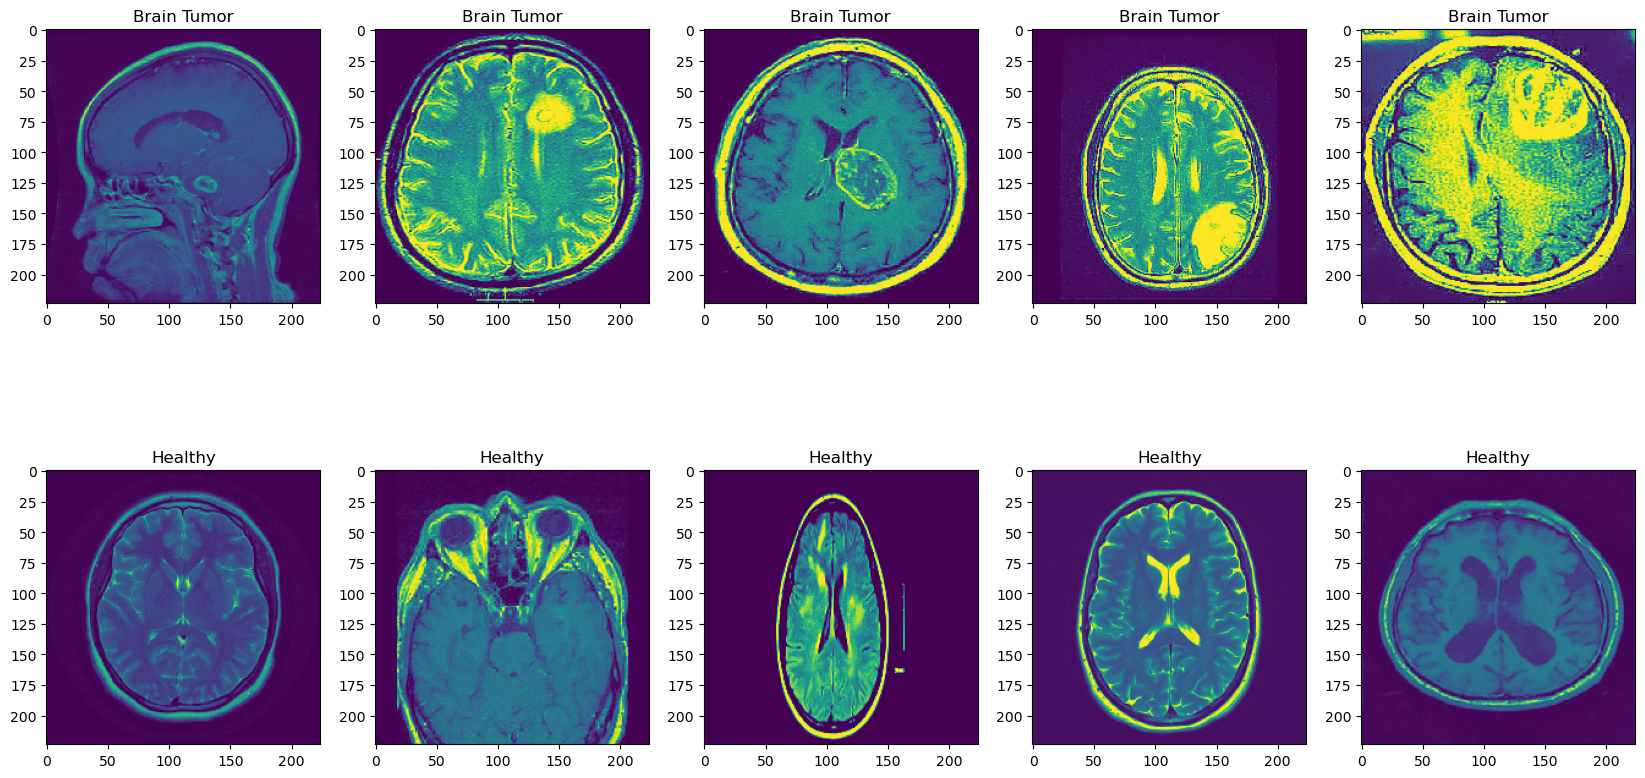

In [21]:
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(20.5, 10.5)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_gen[7][0][i+49])
    plt.title(case_of_image[test_gen[7][1][i+49]])

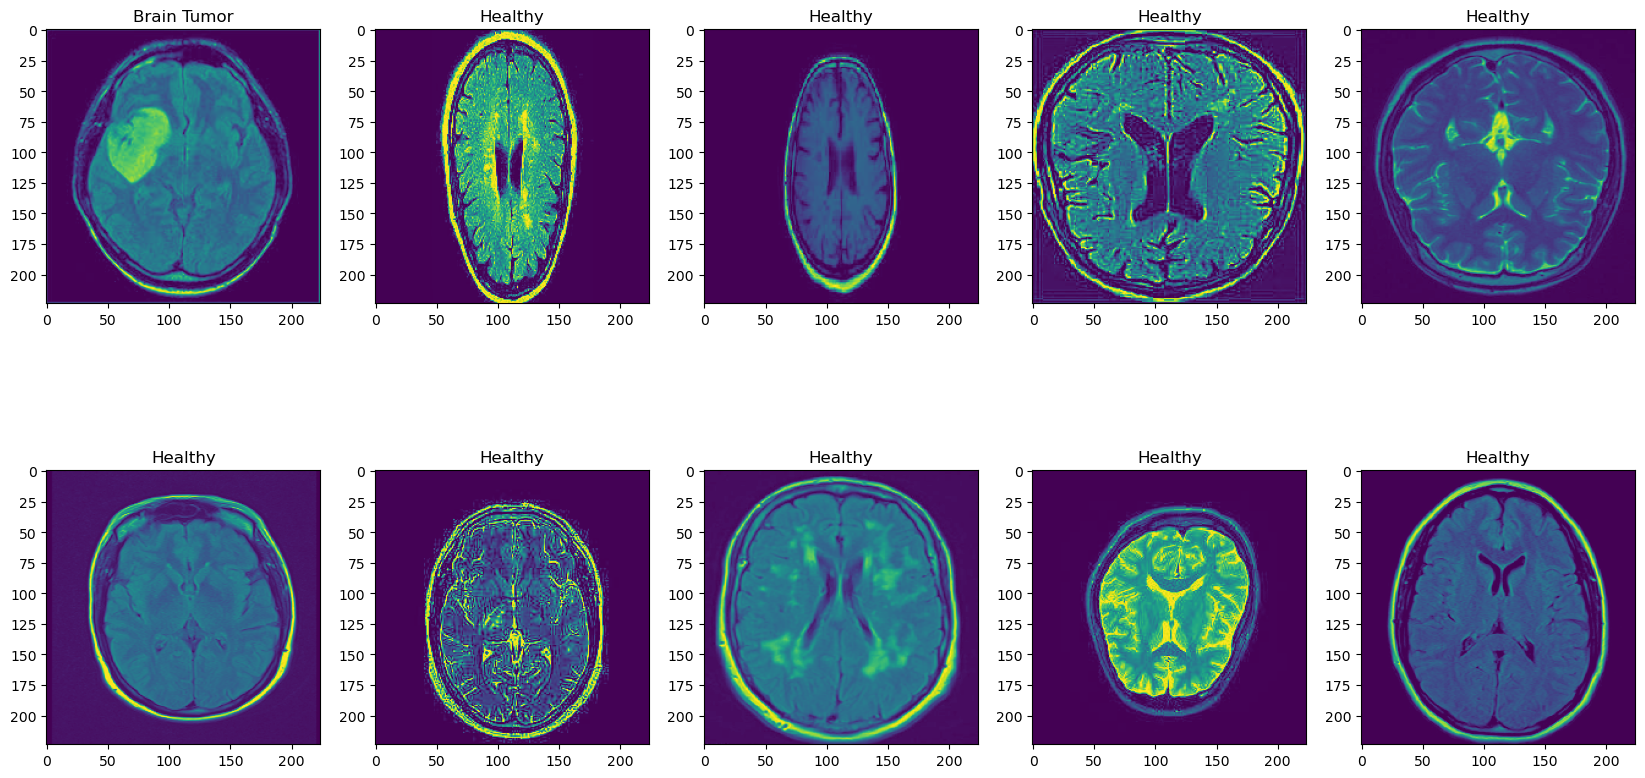

In [22]:
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(20.5, 10.5)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_gen[7][0][i+5])
    plt.title(case_of_image[train_gen[7][1][i+5]])

# Build The Model

In [23]:
model = Sequential()

In [24]:
input_shape = train_gen[0][0][0].shape
# CNN model, Extract the features from the images and build the model
model.add(Conv2D(filters=filters, kernel_size=kernel_size, input_shape=input_shape, activation=activation))

model.add(Conv2D(filters=filters * 2, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 4, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 8, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 16, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Dropout(rate=rate))
model.add(Flatten())
model.add(Dense(units=filters*8, activation=activation))

model.add(Dropout(rate=rate))
model.add(Dense(units=filters//8, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 8)       80        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 16)      1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 64)       

In [30]:
model.compile(loss=binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])

* Early stopping and model check point

In [33]:
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01, verbose=1, mode='auto')
mcp = ModelCheckpoint(monitor='val_accuracy', verbose=1, mode='auto', filepath='Brain Tumor.h5')
em = [es, mcp]

In [37]:
model = model.fit_generator(
    train_gen,
    steps_per_epoch=(train_gen.samples // batch_size) ,
    epochs=epochs,
    validation_data=test_gen,
    callbacks=em)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
57/57 [==============================] - ETA: 0s - loss: 0.5750 - accuracy: 0.6945
Epoch 00001: saving model to Brain Tumor.h5
57/57 [==============================] - 74s 1s/step - loss: 0.5750 - accuracy: 0.6945 - val_loss: 0.4403 - val_accuracy: 0.8030
Epoch 2/40
57/57 [==============================] - ETA: 0s - loss: 0.3779 - accuracy: 0.8278
Epoch 00002: saving model to Brain Tumor.h5
57/57 [==============================] - 70s 1s/step - loss: 0.3779 - accuracy: 0.8278 - val_loss: 0.3163 - val_accuracy: 0.8716
Epoch 3/40
57/57 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.8936
Epoch 00003: saving model to Brain Tumor.h5
57/57 [==============================] - 72s 1s/step - loss: 0.2559 - accuracy: 0.8936 - val_loss: 0.2704 - val_accuracy: 0.8792
Epoch 4/40
57/57 [==============================] - ETA: 0s - loss: 0.1748 - accuracy: 0.9301
Epoch 00004: saving model to 

In [42]:
history = model.history

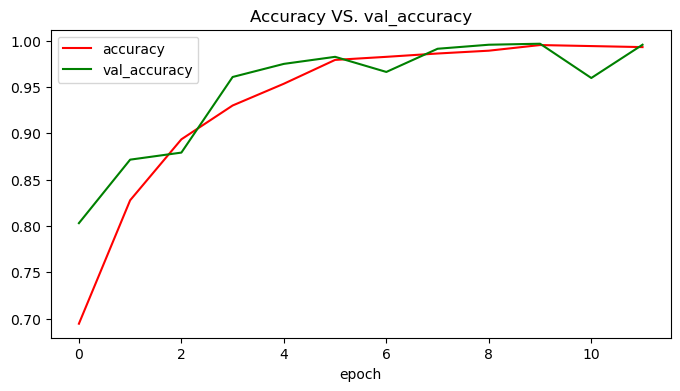

In [81]:
plt.subplots(figsize=(8, 4))
plt.plot(history["accuracy"], c='r', label='accuracy')
plt.plot(history["val_accuracy"], c='g', label='val_accuracy')
plt.title('Accuracy VS. val_accuracy')
plt.xlabel("epoch")
plt.legend()

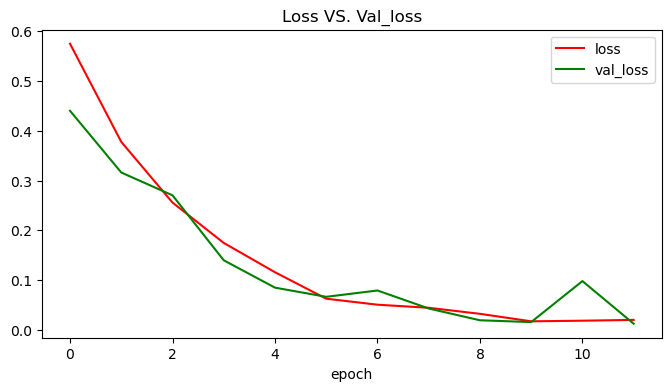

In [82]:
plt.subplots(figsize=(8, 4))
ax = plt.gca()
ax.plot(history["loss"], c='r', label='loss')
ax.plot(history["val_loss"], c='g', label='val_loss')
plt.title("Loss VS. Val_loss")
plt.xlabel("epoch")
plt.legend()

# Test the model on random image

In [129]:
model = load_model("Brain Tumor.h5")

(1, 224, 224, 1)

In [ ]:
path = "C:\\Users\\MBR\\Desktop\\Projects\\Brain Tumor\\Brain Tumor Data Set\\Brain Tumor Data Set\\Healthy\\Not Cancer  (303).jpg"
img = load_img(path, target_size=target_size,color_mode="grayscale")
img = img_to_array(img)/255
img = np.expand_dims(img, axis=0)
img.shape

In [131]:
pred = model.predict_classes(img)
pred

array([[1]])

In [134]:
path = "C:\\Users\\MBR\\Desktop\\Projects\\Brain Tumor\\Brain Tumor Data Set\\Brain Tumor Data Set\\Brain Tumor\\Cancer (45).jpg"
img = load_img(path, target_size=target_size,color_mode="grayscale")
img = img_to_array(img)/255
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 1)

In [135]:
pred = model.predict_classes(img)
pred

array([[0]])